In [10]:
import pandas as pd
import numpy as np

In [75]:
#데이터 불러오기
mental_df = pd.read_csv("Mental Health Dataset.csv")
mental_df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [76]:
#데이터 info
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [77]:
#describe 확인
mental_df.describe(include = 'O')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [78]:
mental_df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

### 결측치 처리 논의 必

In [79]:
#결측치 처리하기
mental = mental_df.dropna()
mental.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [80]:
mental['family_history'].value_counts()

No     173668
Yes    113494
Name: family_history, dtype: int64

In [63]:
#레이블 인코딩
mental_copy = mental

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
change_columns = ['Gender', 'Occupation', 'self_employed','family_history','treatment', 'Days_Indoors', 'Growing_Stress','Changes_Habits',
                  'Mental_Health_History','Mood_Swings','Coping_Struggles',
                  'Work_Interest','Social_Weakness','mental_health_interview','care_options']
for columns in change_columns:
    mental[columns] = le.fit_transform(mental[columns])

mental.head()

C:\Users\user\AppData\Local\Temp\ipykernel_40016\1432660008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental[columns] = le.fit_transform(mental[columns])


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,8/27/2014 11:43,0,United States,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,8/27/2014 11:49,0,Poland,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,8/27/2014 11:51,0,Australia,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,8/27/2014 11:52,0,United States,1,0,0,0,0,2,1,2,2,0,1,2,1,0


- Gender → Male : 0, Female : 1
- Occupation → Bussiness : 0 , Corperate : 1, housewife : 2, Others : 3, Student : 4
- self_employed → No : 0, Yes : 1
- family_history → No : 0, Yes : 1
- treatment	→Yes : 0, No : 1
- Days_Indoors → 1-14 days : 0, 31-60 days :1,Go out Every day : 2, More than 2 months : 3, 15-30 days : 4
- Growing_Stress →Maybe:0 , No:1 , Yes:2
- Changes_Habits →Maybe:0 , No:1 , Yes:2
- Mental_Health_History	→ Maybe:0 , No:1 , Yes:2
- Mood_Swings → High :0, Low: 1, Medium : 2
- Coping_Struggles →No :0 , Yes : 1
- Work_Interest	→Maybe:0 , No:1 , Yes:2
- Social_Weakness →	Maybe:0 , No:1 , Yes:2
- mental_health_interview → Maybe:0 , No:1 , Yes:2
- care_options →No:0, Not Sure: 1, Yes: 2


### care_options 컬럼 : 다른 컬럼값들과 달리 No : 0, Not Sure : 1, Yes: 2 임
다른 것과 동일하게 바꿀까요?

In [81]:
mental_copy['family_history'].value_counts()

0    173668
1    113494
Name: family_history, dtype: int64

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'self_employed'}>,
        <Axes: title={'center': 'family_history'}>],
       [<Axes: title={'center': 'treatment'}>,
        <Axes: title={'center': 'Days_Indoors'}>,
        <Axes: title={'center': 'Growing_Stress'}>,
        <Axes: title={'center': 'Changes_Habits'}>],
       [<Axes: title={'center': 'Mental_Health_History'}>,
        <Axes: title={'center': 'Mood_Swings'}>,
        <Axes: title={'center': 'Coping_Struggles'}>,
        <Axes: title={'center': 'Work_Interest'}>],
       [<Axes: title={'center': 'Social_Weakness'}>,
        <Axes: title={'center': 'mental_health_interview'}>,
        <Axes: title={'center': 'care_options'}>, <Axes: >]], dtype=object)

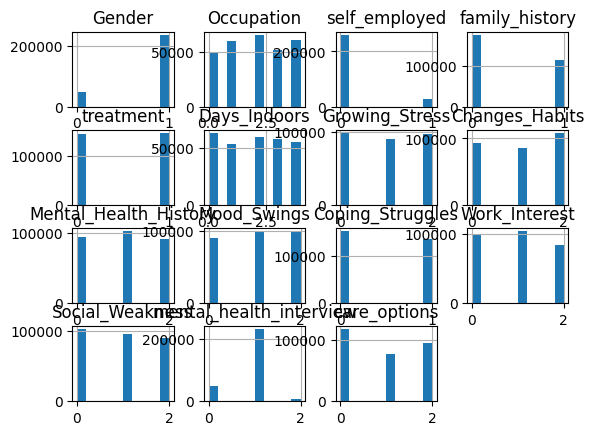

In [85]:
#데이터 분포 확인하기
import matplotlib.pyplot as plt
mental_copy.hist()